In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Global_Cybersecurity_Threats_2015-2024.csv to Global_Cybersecurity_Threats_2015-2024.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')

In [ ]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [ ]:
print(df.columns)
print(df['Country'].unique())

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')
['China' 'India' 'UK' 'Germany' 'France' 'Australia' 'Russia' 'Brazil'
 'Japan' 'USA']


In [ ]:
categorical_cols = [
    'Country',
    'Attack Type',
    'Target Industry',
    'Attack Source',
    'Security Vulnerability Type',
    'Defense Mechanism Used'
]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = df.copy()

encoded = {}

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoded[col] = le

In [ ]:
encoded['Country']

LabelEncoder()

In [ ]:
features = df_encoded.columns.tolist()
print("Final columns being used for ML:", features)

X = df_encoded.values

Final columns being used for ML: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']


In [ ]:
df_encoded.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.87596534, -0.19959481,  0.29458099, ..., -0.45917031,
         1.41151048,  1.2896175 ],
       [-0.87596534, -0.19959481,  0.87484559, ..., -0.45917031,
         0.70398643,  1.67858372],
       [ 0.17003281, -0.89951817, -0.2856836 , ...,  0.42782965,
         1.41151048, -0.80107593],
       ...,
       [-1.22463139, -0.89951817,  1.45511018, ...,  0.42782965,
        -1.41858572, -0.31486815],
       [ 1.21603096,  0.85029022,  1.45511018, ..., -0.45917031,
         0.70398643, -1.33590448],
       [-0.17863324,  0.50032855,  1.45511018, ...,  1.3148296 ,
         1.41151048,  1.33823828]])

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso_forest.fit_predict(X_scaled)

#  (1: normal, -1: anomaly)
df_encoded['Anomaly'] = y_pred


In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso_forest.fit_predict(X_scaled)
df_encoded['Anomaly'] = y_pred

In [ ]:
df_encoded.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Anomaly
0,2,2019,3,1,80.53,773169,0,1,4,63,1
1,2,2019,4,5,62.19,295961,0,1,3,71,1
2,5,2017,2,4,38.65,605895,0,2,4,20,1
3,8,2024,4,6,41.44,659320,2,0,0,7,1
4,4,2018,2,4,74.41,810682,1,0,4,68,1


In [ ]:

anomalies = df_encoded[df_encoded['Anomaly'] == -1]

normals = df_encoded[df_encoded['Anomaly'] == 1]

# Count
print(f"Total Anomalies: {len(anomalies)}")
print(f"Total Normals: {len(normals)}")


Total Anomalies: 150
Total Normals: 2850


In [ ]:
print(anomalies['Incident Resolution Time (in Hours)'].mean())


38.833333333333336


In [ ]:
from sklearn.svm import OneClassSVM

svm_model = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
svm_preds = svm_model.fit_predict(X_scaled)

results = df_encoded.copy()
results['IsolationForest'] = y_pred
results['OneClassSVM'] = svm_preds


In [ ]:
print(" Isolation Forest Anomalies:", (results['IsolationForest'] == -1).sum())
print(" One-Class SVM Anomalies:", (results['OneClassSVM'] == -1).sum())

 Isolation Forest Anomalies: 150
 One-Class SVM Anomalies: 149


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to df
results['PCA1'] = X_pca[:, 0]
results['PCA2'] = X_pca[:, 1]


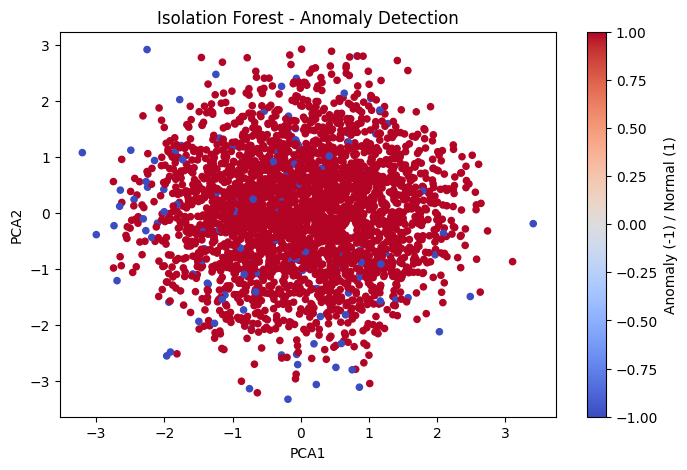

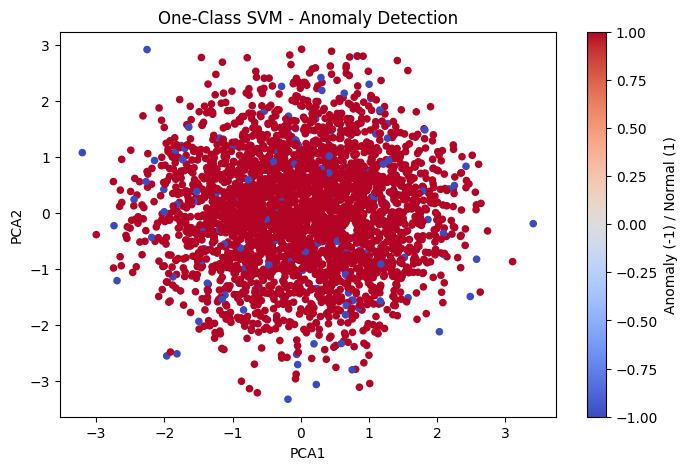

In [ ]:
# Isolation Forest Plot
plt.figure(figsize=(8,5))
plt.title("Isolation Forest - Anomaly Detection")
plt.scatter(results['PCA1'], results['PCA2'],
            c=results['IsolationForest'], cmap='coolwarm', s=20)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.show()

# One-Class SVM Plot
plt.figure(figsize=(8,5))
plt.title("One-Class SVM - Anomaly Detection")
plt.scatter(results['PCA1'], results['PCA2'],
            c=results['OneClassSVM'], cmap='coolwarm', s=20)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.show()


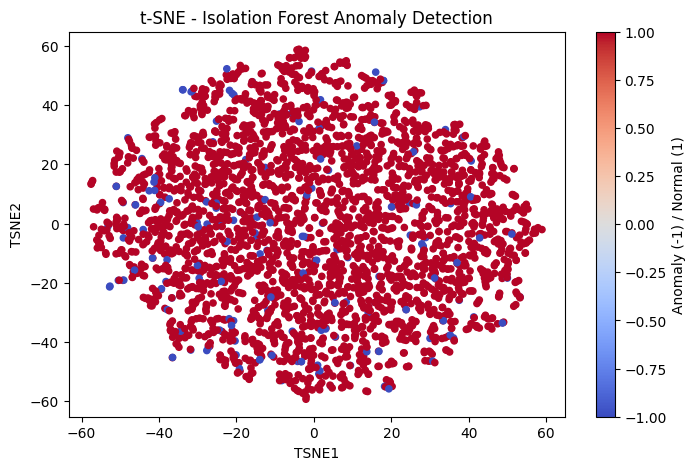

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

results['TSNE1'] = X_tsne[:, 0]
results['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(8,5))
plt.title("t-SNE - Isolation Forest Anomaly Detection")
plt.scatter(results['TSNE1'], results['TSNE2'],
            c=results['IsolationForest'], cmap='coolwarm', s=20)
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()


In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP on scaled data
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Add to results DataFrame
results['UMAP1'] = X_umap[:, 0]
results['UMAP2'] = X_umap[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


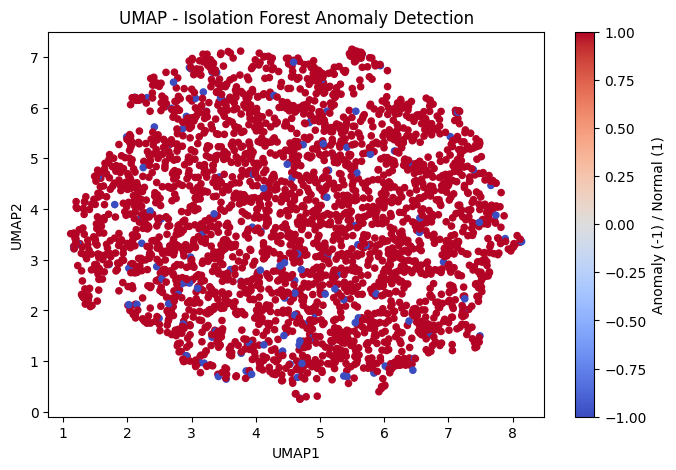

In [ ]:
plt.figure(figsize=(8,5))
plt.title("UMAP - Isolation Forest Anomaly Detection")
plt.scatter(results['UMAP1'], results['UMAP2'],
            c=results['IsolationForest'], cmap='coolwarm', s=20)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN on PCA-reduced or UMAP-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)  # you can also try X_pca or X_umap for better separation
results['DBSCAN'] = db_labels


In [ ]:
print("🔹 DBSCAN Anomalies:", (results['DBSCAN'] == -1).sum())

🔹 DBSCAN Anomalies: 3000


In [ ]:
a = results[results['DBSCAN'] == -1]
b = results[results['DBSCAN'] == 1]

In [ ]:
print("Anomolies are in this case ",len(a))
print("Normal are in this case ",len(b))

Anomolies are in this case  3000
Normal are in this case  0


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

lof_preds = lof.fit_predict(X_scaled)

results['LOF'] = lof_preds


In [ ]:
print("🔹 LocalOutlier factor Anomalies:", (results['LOF'] == -1).sum())

🔹 LocalOutlier factor Anomalies: 150


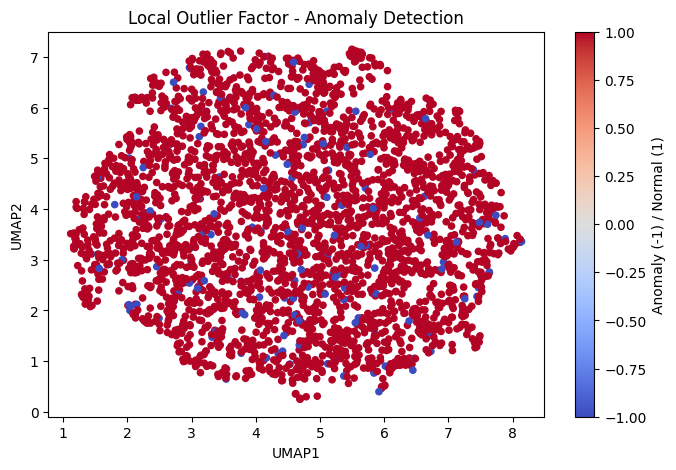

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Local Outlier Factor - Anomaly Detection")
plt.scatter(results['UMAP1'], results['UMAP2'],
            c=results['LOF'], cmap='coolwarm', s=20)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label='Anomaly (-1) / Normal (1)')
plt.show()


In [ ]:
# red dot = normal , blue dot = anomoly